In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow
import glob
import pickle
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive


/content/drive


In [ ]:
cd My Drive

/content/drive/My Drive


In [ ]:
cd data

/content/drive/My Drive/data


In [ ]:
x_normal = np.load('x_normal.npy')

x_viral = np.load('x_viral.npy')

x_bacterial = np.load('x_bacterial.npy')

x_covid = np.load('x_covid.npy')


In [ ]:
y_normal = []
y_viral = []
y_bacterial = []
y_covid = []

In [ ]:
print(x_normal.shape)
print(x_viral.shape)
print(x_bacterial.shape)
print(x_covid.shape)

(1583, 256, 256, 3)
(1504, 256, 256, 3)
(2786, 256, 256, 3)
(301, 256, 256, 3)


In [ ]:
import random
x_train=[]
y_train=[]
x_test = []
y_test = []

In [ ]:
nums = random.sample(range(0, 2786), 150)
for i in nums:
  x_train.append(x_bacterial[i])
  y_train.append(1)

total = [i for i in range(0,2786)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_bacterial[i])
  y_test.append(1)

In [ ]:
nums = random.sample(range(0, 1504), 150)
for i in nums:
  x_train.append(x_viral[i])
  y_train.append(2)

total = [i for i in range(0,1504)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_viral[i])
  y_test.append(2)

In [ ]:
nums = random.sample(range(0, 301), 150)
for i in nums:
  x_train.append(x_covid[i])
  y_train.append(3)

total = [i for i in range(0,301)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_covid[i])
  y_test.append(3)

In [ ]:
nums = random.sample(range(0, 1583), 450)
for i in nums:
  x_train.append(x_normal[i])
  y_train.append(0)

total = [i for i in range(0,1583)]
test_nums = random.sample(list((set)(total)-(set)(nums)),20)

for i in test_nums:
  x_test.append(x_normal[i])
  y_test.append(0)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

900
900
80
80


In [ ]:
x_train = np.asarray(x_train)
y_train= np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:
for i in range(len(x_train)):
    img = x_train[i]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  
    x_train[i]=img

print('Shape of train images: ', x_train[0].shape)

Shape of train images:  (256, 256, 3)


In [ ]:
for i in range(len(x_test)):
    img = x_test[i]
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    lab_planes = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

    lab_planes[0] = clahe.apply(lab_planes[0])

    lab = cv2.merge(lab_planes)

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  
    x_test[i]=img

print('Shape of train images: ', x_train[0].shape)

Shape of train images:  (256, 256, 3)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(900, 256, 256, 3)
(80, 256, 256, 3)
(900,)
(80,)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import adam
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
    model = Sequential()
    model.add(layers.Conv2D(filters=8,kernel_size=(3,3),input_shape=(256,256,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
    
    model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.Conv2D(filters=16,kernel_size=(1,1),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
 
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
    
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    
    model.add(layers.Conv2D(filters=2,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.Flatten())

    #model.add(layers.Dense(64, activation='relu')) 
    model.add(layers.Dense(4, activation='sigmoid'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y=y_train.reshape(-1,1)
yfunc=enc.fit(y)
y_binary=enc.transform(y).toarray()

In [ ]:
opt = adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=32)
mc = ModelCheckpoint('ldn_4class_24jun01_clahe.h5', monitor='val_accuracy',mode='max', verbose=1, save_best_only=True)
history=model.fit(x_train,y_binary,batch_size=16,epochs=100, validation_split=0.2,callbacks=[es,mc],shuffle=True)

Train on 720 samples, validate on 180 samples
Epoch 1/100
720/720 [==============================] - 58s 81ms/step - loss: 0.5807 - accuracy: 0.7236 - val_loss: 0.4544 - val_accuracy: 0.8653

Epoch 00001: val_accuracy improved from -inf to 0.86528, saving model to ldn_4class_24jun01_clahe.h5
Epoch 2/100
720/720 [==============================] - 58s 80ms/step - loss: 0.3722 - accuracy: 0.8392 - val_loss: 0.3769 - val_accuracy: 0.9194

Epoch 00002: val_accuracy improved from 0.86528 to 0.91944, saving model to ldn_4class_24jun01_clahe.h5
Epoch 3/100
720/720 [==============================] - 58s 80ms/step - loss: 0.2659 - accuracy: 0.8892 - val_loss: 0.3427 - val_accuracy: 0.8833

Epoch 00003: val_accuracy did not improve from 0.91944
Epoch 4/100
720/720 [==============================] - 58s 80ms/step - loss: 0.2163 - accuracy: 0.9118 - val_loss: 0.2773 - val_accuracy: 0.9083

Epoch 00004: val_accuracy did not improve from 0.91944
Epoch 5/100
720/720 [==============================] - 

In [ ]:
with open('ldn_4class_24jun01_clahe.h5', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

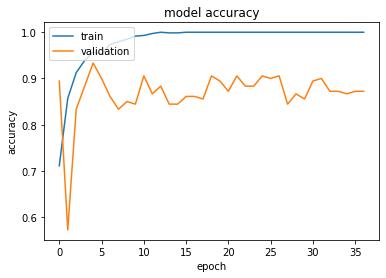

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show() 

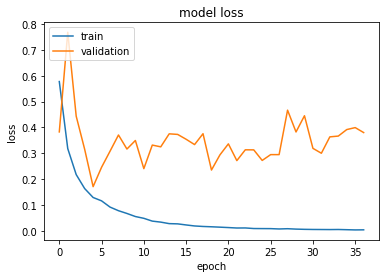

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 8)       224       
_________________________________________________________________
batch_normalization_6 (Batch (None, 256, 256, 8)       32        
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 16)      64        
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 128, 128, 16)     

In [ ]:
    model = Sequential()
    model.add(layers.Conv2D(filters=8,kernel_size=(3,3),input_shape=(256,256,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
    
    model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.Conv2D(filters=16,kernel_size=(1,1),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    model.add(layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
 
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
    
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.1))
    
    model.add(layers.Conv2D(filters=2,kernel_size=(3,3),strides=1,padding='same'))
    model.add(layers.Flatten())

    #model.add(layers.Dense(64, activation='relu')) 
    model.add(layers.Dense(4, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.load_weights('ldn_4class_24jun01_clahe.h5')

In [ ]:
y_test=y_test.reshape(-1,1)
y_test_binary=enc.transform(y_test).toarray()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
_, test_acc = model.evaluate(x_test, y_test_binary, verbose=0)

In [ ]:
print("test accuracy: ",test_acc,)
print("test loss    : ",_)

test accuracy:  0.859375
test loss    :  0.3043156355619431


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred.shape

(80, 4)

In [ ]:
y_label=enc.inverse_transform(y_pred)

In [ ]:
#sample_labels=enc.inverse_transform(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:

test_acc=accuracy_score(y_test, y_label)

In [ ]:
test_acc

0.775

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_label)

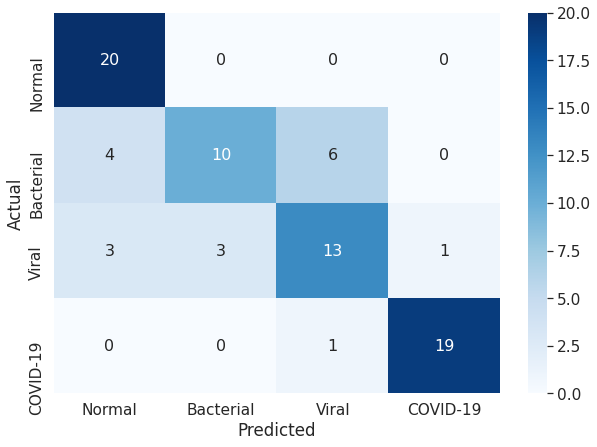

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_label)
import seaborn as sns
df_cm = pd.DataFrame(cm, columns=['Normal','Bacterial','Viral','COVID-19'], index = ['Normal','Bacterial','Viral','COVID-19'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='d')

In [ ]:
def confusion_metrics(cm):
  tp_nor=cm[0][0]
  fp_nor=cm[1][0]+cm[2][0]+cm[3][0]
  fn_nor=cm[0][1]+cm[0][2]+cm[0][3]
  tn_nor=np.sum(cm)-(tp_nor+fp_nor+fn_nor)
  tp_bac=cm[1][1]
  fp_bac=cm[0][1]+cm[2][1]+cm[3][1]
  fn_bac=cm[1][0]+cm[1][2]+cm[1][3]
  tn_bac=np.sum(cm)-(tp_bac+fp_bac+fn_bac)
  tp_vir=cm[2][2]
  fp_vir=cm[0][2]+cm[1][2]+cm[3][2]
  fn_vir=cm[2][0]+cm[2][1]+cm[2][3]
  tn_vir=np.sum(cm)-(tp_vir+fp_vir+fn_vir)
  tp_cov=cm[3][3]
  fp_cov=cm[0][3]+cm[1][3]+cm[2][3]
  fn_cov=cm[3][0]+cm[3][1]+cm[3][2]
  tn_cov=np.sum(cm)-(tp_cov+fp_cov+fn_cov)

  print("Normal : ")
  print("-----------------------------------")
  print("TP : ",tp_nor)
  print("TN : ",tn_nor)
  print("FP : ",fp_nor)
  print("FN : ",fn_nor)
  print("sensitivity : ",tp_nor/(float)((tp_nor+fn_nor)))
  print("specificity : ",tn_nor/(float)((tn_nor+fp_nor)))
  print("-----------------------------------")
  print("Bacteria : ")
  print("-----------------------------------")
  print("TP : ",tp_bac)
  print("TN : ",tn_bac)
  print("FP : ",fp_bac)
  print("FN : ",fn_bac)
  print("sensitivity : ",tp_bac/(float)((tp_bac+fn_bac)))
  print("specificity : ",tn_bac/(float)((tn_bac+fp_bac)))
  print("-----------------------------------")
  print("Viral : ")
  print("-----------------------------------")
  print("TP : ",tp_vir)
  print("TN : ",tn_vir)
  print("FP : ",fp_vir)
  print("FN : ",fn_vir)
  print("sensitivity : ",tp_vir/(float)((tp_vir+fn_vir)))
  print("specificity : ",tn_vir/(float)((tn_vir+fp_vir)))
  print("-----------------------------------")
  print("COVID-19 : ")
  print("-----------------------------------")
  print("TP : ",tp_cov)
  print("TN : ",tn_cov)
  print("FP : ",fp_cov)
  print("FN : ",fn_cov)
  print("sensitivity : ",tp_cov/(float)((tp_cov+fn_cov)))
  print("specificity : ",tn_cov/(float)((tn_cov+fp_cov)))


In [ ]:
confusion_metrics(cm)

Normal : 
-----------------------------------
TP :  20
TN :  53
FP :  7
FN :  0
sensitivity :  1.0
specificity :  0.8833333333333333
-----------------------------------
Bacteria : 
-----------------------------------
TP :  10
TN :  57
FP :  3
FN :  10
sensitivity :  0.5
specificity :  0.95
-----------------------------------
Viral : 
-----------------------------------
TP :  13
TN :  53
FP :  7
FN :  7
sensitivity :  0.65
specificity :  0.8833333333333333
-----------------------------------
COVID-19 : 
-----------------------------------
TP :  19
TN :  59
FP :  1
FN :  1
sensitivity :  0.95
specificity :  0.9833333333333333
